<a href="https://colab.research.google.com/github/Cousigames/Assignment1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone.csv
Saving penguins.csv to penguins.csv


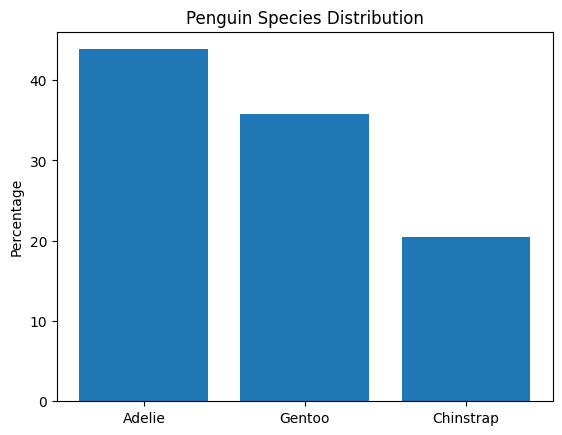

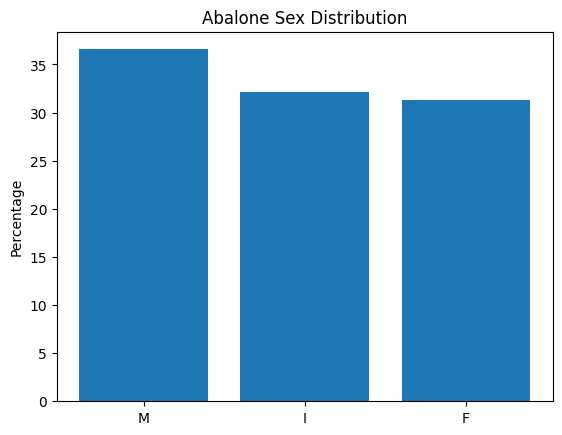

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load Penguin dataset
penguins = pd.read_csv('penguins.csv')

#Convert island and sex into numerial format using one-hot encoding
one_hot_encoder = OneHotEncoder()
penguins_encoded = pd.DataFrame(one_hot_encoder.fit_transform(penguins[['island','sex']]).toarray())

#Convert into categories
penguins['island'] = penguins['island'].astype('category').cat.codes
penguins['sex'] = penguins['sex'].astype('category').cat.codes

# Load the Abalone dataset
abalone = pd.read_csv('abalone.csv')

# Abalone features are all numerical so no need to convert

# Plotting the class distribution for the Penguin dataset

penguin_classes = penguins['species'].value_counts(normalize=True)*100
plt.bar(penguin_classes.index, penguin_classes.values)
plt.title('Penguin Species Distribution')
plt.ylabel('Percentage')
plt.savefig('penguin-classes.png', format= 'png')
plt.show()

#Split the dataset using train test split
x_penguins = penguins.drop('species', axis=1) # The Features
y_penguins = penguins['species'] #The Labels
x_train_penguins, x_test_penguins, y_train_penguins, y_test_penguins = train_test_split(x_penguins, y_penguins, random_state=42)


# Plotting the class distribution for the Abalone dataset

abalone_classes = abalone['Type'].value_counts(normalize=True)*100
plt.bar(abalone_classes.index, abalone_classes.values)
plt.title('Abalone Sex Distribution')
plt.ylabel('Percentage')
plt.savefig('abalone-classes.png', format= 'png')
plt.show()

#Split the dataset using train test split
x_abalone = abalone.drop('Type', axis=1) # The Features
y_abalone = abalone['Type'] #The Labels
x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone = train_test_split(x_abalone, y_abalone, random_state=42)







/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


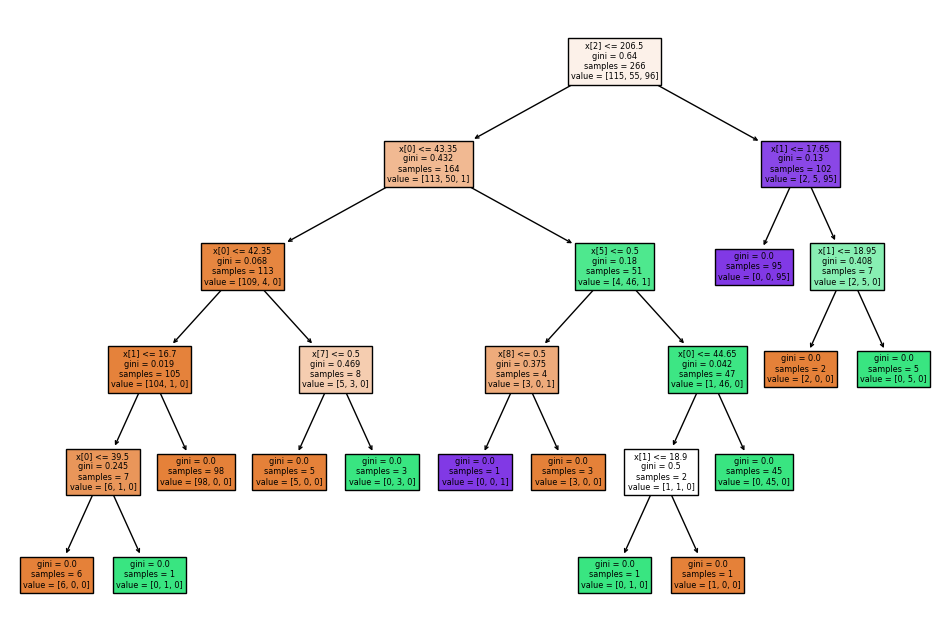

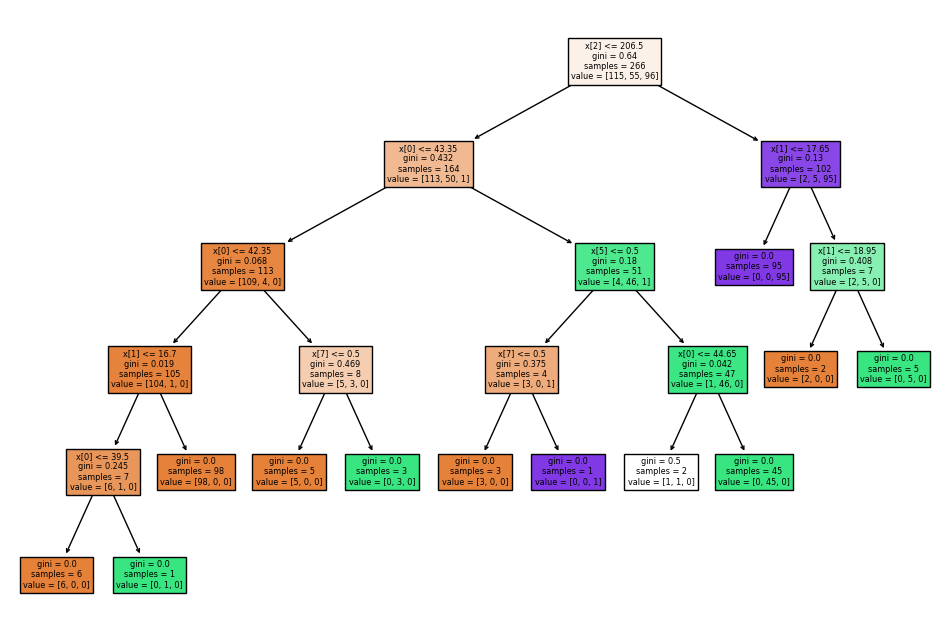

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder


import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder

# Loading the penguin dataset here
penguins = pd.read_csv('penguins.csv')

# One-hot encode the categorical features needed
categorical_features = ['island', 'sex']
one_hot_encoder = OneHotEncoder(sparse=False)
penguins_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(penguins[categorical_features]),
    columns=one_hot_encoder.get_feature_names_out(categorical_features)
)

# Drop the original categorical features and concatenate the one-hot encoded features
penguins = pd.concat([
    penguins.drop(categorical_features, axis=1),
    penguins_encoded
], axis=1)

# Replace 'species' with the actual target column name in our dataset
X = penguins.drop('species', axis=1)
y = penguins['species']

# Split the data into training and testing sets to perform operation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Base-DT
base_dt = DecisionTreeClassifier()
base_dt.fit(X_train, y_train)

# Visualize Base-DT
plt.figure(figsize=(12,8))
plot_tree(base_dt, filled=True)
plt.savefig('base_dt_tree.png')
plt.show()

# Grid Search for Top-DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Train and Visualize Top-DT
top_dt = grid_search_dt.best_estimator_
plt.figure(figsize=(12,8))
plot_tree(top_dt, filled=True)
plt.savefig('top_dt_tree.png')
plt.show()

# Base-MLP
base_mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd')
base_mlp.fit(X_train, y_train)

# Grid Search for Top-MLP
param_grid_mlp = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}
grid_search_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train, y_train)

# Train Top-MLP
top_mlp = grid_search_mlp.best_estimator_

